# Load classification Results

In [1]:
import pickle
from discovery.class_analysis import run
from discovery.class_analysis import datatypes
import numpy as np
from importlib import reload
from discovery.utils import filesys

import pandas as pd
import os
import dataclasses
import matplotlib.pyplot as plt

run = reload(run)
filesys = reload(filesys)

filesys.set_directory_in_project()


pygame 2.5.2 (SDL 2.28.3, Python 3.11.7)
Hello from the pygame community. https://www.pygame.org/contribute.html
Changed working directory to /Users/szepi1991/Code/discovery


'/Users/szepi1991/Code/discovery'

In [7]:
def df_with_flat_settings(results: dict):
    return pd.DataFrame([
        dataclasses.asdict(k) | dataclasses.asdict(v)
        for k, v in results.items()
    ])


In [ ]:
def store_df_as_csv(path_to_res_file, df):
    head, tail = os.path.split(path_to_res_file)
    assert tail.endswith(".pkl")
    csv_name = tail[:-4] + "_from_notebook.csv"
    save_to = os.path.join(head, csv_name)
    print("Saving to", save_to)
    df.to_csv(save_to, index=False)

## Minigrid

In [5]:
filesys.set_directory_in_project()
# TWO_ROOMS_PATH = "discovery/class_analysis/two_rooms_RESULTS.pkl"
TWO_ROOMS_PATH = "discovery/class_analysis/two_rooms_RESULTS_old.pkl"

two_rooms_results = run.load_existing_results(TWO_ROOMS_PATH)
for setting, data in two_rooms_results.items():
    print("setting:", setting)
    print("  num_runs: ", data.num_runs)
    print("  lin_acc_mean +- stderr: ", data.lin_acc_mean, "+-", data.lin_acc_std_err)
    print("  nonlin_acc_mean +- stderr: ", data.nonlin_acc_mean, "+-", data.nonlin_acc_std_err)



Changed working directory to /Users/szepi1991/Code/discovery
setting: Setting(multitask=False, model_type=<ModelType.FTA: 2>, env_name=<EnvName.TwoRooms: 1>)
  num_runs:  20
  lin_acc_mean +- stderr:  0.9305099487304688 +- 0.005094512250931477
  nonlin_acc_mean +- stderr:  0.9694806843996048 +- 0.0021518689417643283
setting: Setting(multitask=True, model_type=<ModelType.FTA: 2>, env_name=<EnvName.TwoRooms: 1>)
  num_runs:  20
  lin_acc_mean +- stderr:  0.9331746101379395 +- 0.010932220959090359
  nonlin_acc_mean +- stderr:  0.9541588574647903 +- 0.011300984542400068
setting: Setting(multitask=True, model_type=<ModelType.CNN: 1>, env_name=<EnvName.TwoRooms: 1>)
  num_runs:  20
  lin_acc_mean +- stderr:  0.9120238274335861 +- 0.022157039641192807
  nonlin_acc_mean +- stderr:  0.9395031929016113 +- 0.00708721923863444
setting: Setting(multitask=True, model_type=<ModelType.RANDOM_PROJ_GAUSS: 3>, env_name=<EnvName.TwoRooms: 1>)
  num_runs:  20
  lin_acc_mean +- stderr:  0.9345069408416748 +

In [8]:
df_two_rooms = df_with_flat_settings(two_rooms_results)
df_two_rooms

,multitask,model_type,env_name,wandb_ids,num_runs,lin_accuracies,lin_conf_matrices,lin_acc_mean,lin_acc_std_err,nonlin_accuracies,nonlin_conf_matrices,nonlin_acc_mean,nonlin_acc_std_err
0,False,ModelType.FTA,EnvName.TwoRooms,"[1itlnbj2, tgqdhch8, jaq1ddx8, 8oppyosv, pt6ti...",20,"[0.8630605936050415, 0.9496622085571289, 0.936...","[[[255, 33], [0, 4]], [[281, 7], [0, 4]], [[27...",0.930510,0.005095,"[0.9729780554771423, 0.9729780554771423, 0.972...","[[[288, 0], [0, 4]], [[288, 0], [0, 4]], [[288...",0.969481,0.002152
1,True,ModelType.FTA,EnvName.TwoRooms,"[PPO_TwoRoomEnv_jtdce1k4, PPO_TwoRoomEnv_cwlr3...",20,"[0.9596547484397888, 0.969647228717804, 0.8464...","[[[284, 4], [0, 4]], [[287, 1], [0, 4]], [[250...",0.933175,0.010932,"[0.9729780554771423, 0.9729780554771423, 0.846...","[[[288, 0], [0, 4]], [[288, 0], [0, 4]], [[250...",0.954159,0.011301
2,True,ModelType.CNN,EnvName.TwoRooms,"[x5jjdcr6, u5mtldih, zv4o8fly, rc08iywh, gniej...",20,"[0.8730531334877014, 0.7165040373802185, 0.603...","[[[258, 30], [0, 4]], [[210, 78], [1, 3]], [[1...",0.912024,0.022157,"[0.9396697282791138, 0.8763839602470398, 0.893...","[[[278, 10], [0, 4]], [[259, 29], [0, 4]], [[2...",0.939503,0.007087
3,True,ModelType.RANDOM_PROJ_GAUSS,EnvName.TwoRooms,"[None, None, None, None, None, None, None, Non...",20,"[0.9529930353164673, 0.9729780554771423, 0.936...","[[[282, 6], [0, 4]], [[288, 0], [0, 4]], [[277...",0.934507,0.017434,"[0.9729780554771423, 0.9729780554771423, 0.972...","[[[288, 0], [0, 4]], [[288, 0], [0, 4]], [[288...",0.972978,0.000000
4,True,ModelType.RANDOM_PROJ_SPARSE,EnvName.TwoRooms,"[None, None, None, None, None, None, None, Non...",20,"[0.9729780554771423, 0.9729780554771423, 0.972...","[[[288, 0], [0, 4]], [[288, 0], [0, 4]], [[288...",0.972978,0.000000,"[0.9729780554771423, 0.9729780554771423, 0.972...","[[[288, 0], [0, 4]], [[288, 0], [0, 4]], [[288...",0.972978,0.000000
5,False,ModelType.CNN,EnvName.TwoRooms,"[arciq5xu, 5cc1cxom, 5li84sl8, 8xcxbyb0, hpx0v...",20,"[0.7631356716156006, 0.6132482886314392, 0.896...","[[[223, 65], [2, 2]], [[180, 108], [0, 4]], [[...",0.785619,0.054845,"[0.8197597861289978, 0.8430756330490112, 0.956...","[[[240, 48], [2, 2]], [[249, 39], [0, 4]], [[2...",0.941335,0.010295


In [38]:
label_mapping = {
    (False, datatypes.ModelType.FTA): "Single-Task; FTA",
    (False, datatypes.ModelType.CNN): "Single-Task; CNN",
    (True, datatypes.ModelType.FTA): "Multi-Task; FTA",
    (True, datatypes.ModelType.CNN): "Multi-Task; CNN",
    (True, datatypes.ModelType.RANDOM_PROJ_GAUSS): "Random Gaussian Proj.",
    (True, datatypes.ModelType.RANDOM_PROJ_SPARSE): "Random Sparse Proj.",
}

def clean_df(df, label_mapping):

    df_clean = df.loc[:, (
        "multitask", "model_type",
        "lin_acc_mean", "lin_acc_std_err",
        "nonlin_acc_mean", "nonlin_acc_std_err")]

    df_clean["label"] = df_clean.apply(
        lambda row: label_mapping[(row["multitask"], row["model_type"])], axis=1
    )

    df_clean.drop(columns=["multitask", "model_type"], inplace=True)
    return df_clean

# df.loc[df.env_name == datatypes.EnvName.TwoRooms]
df_two_rooms_clean = clean_df(df_two_rooms, label_mapping)
df_two_rooms_clean

,lin_acc_mean,lin_acc_std_err,nonlin_acc_mean,nonlin_acc_std_err,label
0,0.930510,0.005095,0.969481,0.002152,Single-Task; FTA
1,0.933175,0.010932,0.954159,0.011301,Multi-Task; FTA
2,0.912024,0.022157,0.939503,0.007087,Multi-Task; CNN
3,0.934507,0.017434,0.972978,0.000000,Random Gaussian Proj.
4,0.972978,0.000000,0.972978,0.000000,Random Sparse Proj.
5,0.785619,0.054845,0.941335,0.010295,Single-Task; CNN


/var/folders/xt/69nn93l959l31g_3b686nmsr0000gn/T/ipykernel_13436/3639955979.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_two_rooms_clean['label'], rotation=45, ha='right')


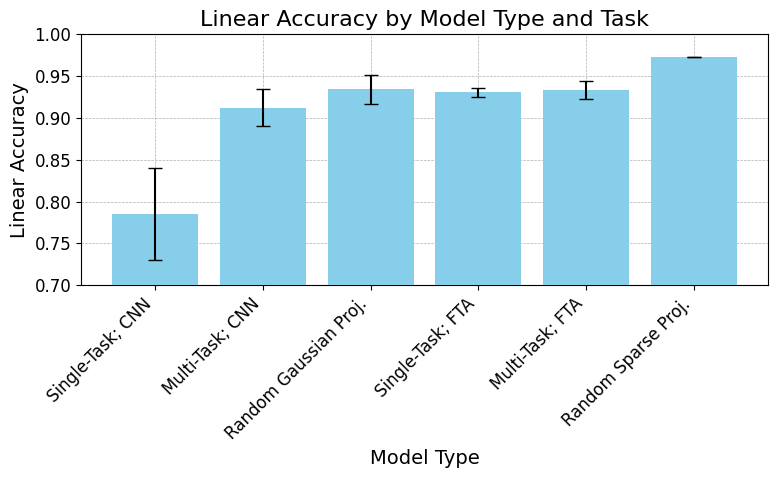

/var/folders/xt/69nn93l959l31g_3b686nmsr0000gn/T/ipykernel_13436/3639955979.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_two_rooms_clean['label'], rotation=45, ha='right')


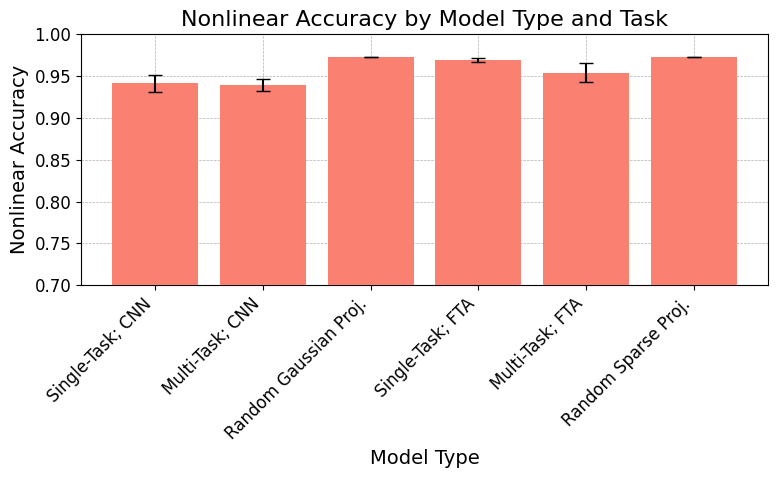

In [25]:
# Reorder DataFrame based on the specified order
order = [
    'Single-Task; CNN', 'Multi-Task; CNN', 'Random Gaussian Proj.',
    'Single-Task; FTA', 'Multi-Task; FTA', 'Random Sparse Proj.']
df_two_rooms_clean['order'] = df_two_rooms_clean['label'].apply(lambda x: order.index(x) if x in order else len(order))
df_two_rooms_clean = df_two_rooms_clean.sort_values('order')

# Increase font sizes
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize

# Plotting for linear accuracy
fig, ax = plt.subplots(figsize=(8, 5))

ax.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=0)
ax.bar(df_two_rooms_clean['label'], df_two_rooms_clean['lin_acc_mean'],
       yerr=df_two_rooms_clean['lin_acc_std_err'], capsize=5, color='skyblue',
       zorder=3)

ax.set_xlabel('Model Type')
ax.set_ylabel('Linear Accuracy')
ax.set_title('Linear Accuracy by Model Type and Task')
ax.set_xticklabels(df_two_rooms_clean['label'], rotation=45, ha='right')
ax.set_ylim(0.7, 1.0)

plt.tight_layout()
plt.show()

# Plotting for nonlinear accuracy
fig, ax = plt.subplots(figsize=(8, 5))

ax.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=0)
ax.bar(df_two_rooms_clean['label'], df_two_rooms_clean['nonlin_acc_mean'],
       yerr=df_two_rooms_clean['nonlin_acc_std_err'], capsize=5, color='salmon',
       zorder=3)

ax.set_xlabel('Model Type')
ax.set_ylabel('Nonlinear Accuracy')
ax.set_title('Nonlinear Accuracy by Model Type and Task')
ax.set_xticklabels(df_two_rooms_clean['label'], rotation=45, ha='right')
ax.set_ylim(0.7, 1.0)

plt.tight_layout()
plt.show()

### Atari

When I ran it, I saw some real weird behaviour for the random projections.


But first, let's look at the actual model:

In [28]:
filesys.set_directory_in_project()
seaquest_results = run.load_existing_results(
    "discovery/class_analysis/atari_RESULTS.pkl")

for setting, data in seaquest_results.items():
    print("setting:", setting)
    print("  num_runs: ", data.num_runs)
    print("  lin_acc_mean +- stderr: ", data.lin_acc_mean, "+-", data.lin_acc_std_err)
    print("  nonlin_acc_mean +- stderr: ", data.nonlin_acc_mean, "+-", data.nonlin_acc_std_err)



Changed working directory to /Users/szepi1991/Code/discovery
setting: Setting(multitask=False, model_type=<ModelType.CNN: 1>, env_name=<EnvName.Seaquest: 2>)
  num_runs:  1
  lin_acc_mean +- stderr:  0.9247385859489441 +- 0.0
  nonlin_acc_mean +- stderr:  0.9329859018325806 +- 0.0
setting: Setting(multitask=True, model_type=<ModelType.RANDOM_PROJ_GAUSS: 3>, env_name=<EnvName.Seaquest: 2>)
  num_runs:  5
  lin_acc_mean +- stderr:  0.5930576115846634 +- 0.20387900388819472
  nonlin_acc_mean +- stderr:  0.7791728273034095 +- 0.16646650959766152
setting: Setting(multitask=True, model_type=<ModelType.RANDOM_PROJ_SPARSE: 4>, env_name=<EnvName.Seaquest: 2>)
  num_runs:  5
  lin_acc_mean +- stderr:  0.4069423958659172 +- 0.20387900388819472
  nonlin_acc_mean +- stderr:  0.4069423958659172 +- 0.20387900388819472


Indeed, for the random ones the accuracy is bad, and it's because it is all over the place:

```
Setting(multitask=True, model_type=<ModelType.RANDOM_PROJ_GAUSS: 3>, env_name=<EnvName.Seaquest: 2>)
    no runs for this setting yet, need {num_seeds_needed} more.
     linear acc: 0.9652880430221558
    nonlin acc: 0.9652880430221558
     linear acc: 0.034711964428424835
    nonlin acc: 0.9652880430221558
     linear acc: 0.034711964428424835
    nonlin acc: 0.9652880430221558
     linear acc: 0.9652880430221558
    nonlin acc: 0.034711964428424835
     linear acc: 0.9652880430221558
    nonlin acc: 0.9652880430221558

Adding sparse random projections for EnvName.Seaquest
Setting(multitask=True, model_type=<ModelType.RANDOM_PROJ_SPARSE: 4>, env_name=<EnvName.Seaquest: 2>)
    no runs for this setting yet, need {num_seeds_needed} more.
     linear acc: 0.9652880430221558
    nonlin acc: 0.034711964428424835
     linear acc: 0.034711964428424835
    nonlin acc: 0.9652880430221558
     linear acc: 0.9652880430221558
    nonlin acc: 0.034711964428424835
     linear acc: 0.034711964428424835
    nonlin acc: 0.9652880430221558
     linear acc: 0.034711964428424835
    nonlin acc: 0.034711964428424835

```

A whole bunch of times it does not train.

MAYBE TODO: I could try one thing: I will fix the random projection and run just randomizing over the classifier initialization and batching.

In [29]:
df_seaquest = df_with_flat_settings(seaquest_results)
df_seaquest

,multitask,model_type,env_name,wandb_ids,num_runs,lin_accuracies,lin_conf_matrices,lin_acc_mean,lin_acc_std_err,nonlin_accuracies,nonlin_conf_matrices,nonlin_acc_mean,nonlin_acc_std_err
0,False,ModelType.CNN,EnvName.Seaquest,[Seaquest-v5_mpqgvvr1],1,[0.9247385859489441],"[[[1295, 12], [0, 47]]]",0.924739,0.000000,[0.9329859018325806],"[[[1307, 0], [0, 47]]]",0.932986,0.000000
1,True,ModelType.RANDOM_PROJ_GAUSS,EnvName.Seaquest,"[None, None, None, None, None]",5,"[0.9652880430221558, 0.034711964428424835, 0.0...","[[[1307, 0], [47, 0]], [[0, 1307], [0, 47]], [...",0.593058,0.203879,"[0.9652880430221558, 0.9652880430221558, 0.965...","[[[1307, 0], [47, 0]], [[1307, 0], [47, 0]], [...",0.779173,0.166467
2,True,ModelType.RANDOM_PROJ_SPARSE,EnvName.Seaquest,"[None, None, None, None, None]",5,"[0.9652880430221558, 0.034711964428424835, 0.9...","[[[1307, 0], [47, 0]], [[0, 1307], [0, 47]], [...",0.406942,0.203879,"[0.034711964428424835, 0.9652880430221558, 0.0...","[[[0, 1307], [0, 47]], [[1307, 0], [47, 0]], [...",0.406942,0.203879


In [45]:
list(df_seaquest.loc[
    df_seaquest.model_type == datatypes.ModelType.RANDOM_PROJ_GAUSS].lin_conf_matrices
)

[[array([[1307,    0],
         [  47,    0]]),
  array([[   0, 1307],
         [   0,   47]]),
  array([[   0, 1307],
         [   0,   47]]),
  array([[1307,    0],
         [  47,    0]]),
  array([[1307,    0],
         [  47,    0]])]]

In [46]:
list(df_seaquest.loc[
    df_seaquest.model_type == datatypes.ModelType.RANDOM_PROJ_GAUSS].nonlin_conf_matrices
)

[[array([[1307,    0],
         [  47,    0]]),
  array([[1307,    0],
         [  47,    0]]),
  array([[1307,    0],
         [  47,    0]]),
  array([[   0, 1307],
         [   0,   47]]),
  array([[1307,    0],
         [  47,    0]])]]

In [47]:
list(df_seaquest.loc[
    df_seaquest.model_type == datatypes.ModelType.RANDOM_PROJ_SPARSE].nonlin_conf_matrices
)

[[array([[   0, 1307],
         [   0,   47]]),
  array([[1307,    0],
         [  47,    0]]),
  array([[   0, 1307],
         [   0,   47]]),
  array([[1307,    0],
         [  47,    0]]),
  array([[   0, 1307],
         [   0,   47]])]]

In [48]:
list(df_seaquest.loc[
    df_seaquest.model_type == datatypes.ModelType.CNN].nonlin_conf_matrices
)

[[array([[1307,    0],
         [   0,   47]])]]

In [49]:
list(df_seaquest.loc[
    df_seaquest.model_type == datatypes.ModelType.CNN].nonlin_acc_mean
)

[0.9329859018325806]

In [39]:
label_mapping_seaquest = {
    (False, datatypes.ModelType.FTA): "FTA",
    (False, datatypes.ModelType.CNN): "CNN",
    (True, datatypes.ModelType.FTA): "FTA",
    (True, datatypes.ModelType.CNN): "CNN",
    (True, datatypes.ModelType.RANDOM_PROJ_GAUSS): "Random Gaussian Proj.",
    (True, datatypes.ModelType.RANDOM_PROJ_SPARSE): "Random Sparse Proj.",
}

df_seaquest_clean = clean_df(df_seaquest, label_mapping_seaquest)
df_seaquest_clean

,lin_acc_mean,lin_acc_std_err,nonlin_acc_mean,nonlin_acc_std_err,label
0,0.924739,0.000000,0.932986,0.000000,CNN
1,0.593058,0.203879,0.779173,0.166467,Random Gaussian Proj.
2,0.406942,0.203879,0.406942,0.203879,Random Sparse Proj.


/var/folders/xt/69nn93l959l31g_3b686nmsr0000gn/T/ipykernel_13436/2163504085.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_seaquest_clean['label'], rotation=45, ha='right')


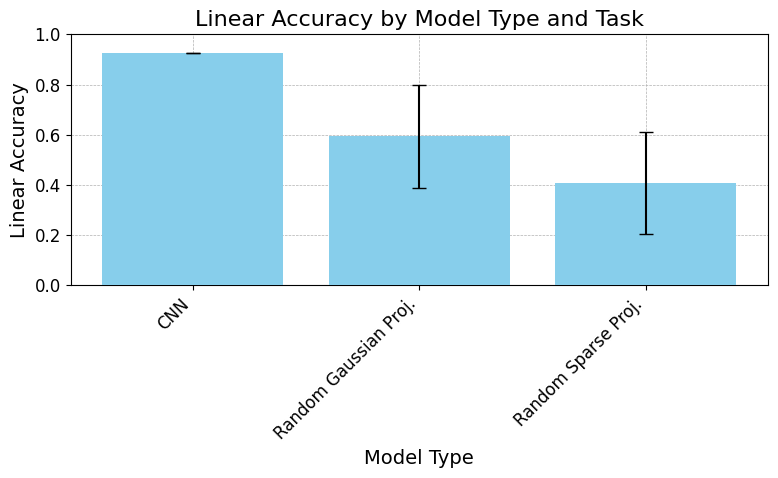

/var/folders/xt/69nn93l959l31g_3b686nmsr0000gn/T/ipykernel_13436/2163504085.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_seaquest_clean['label'], rotation=45, ha='right')


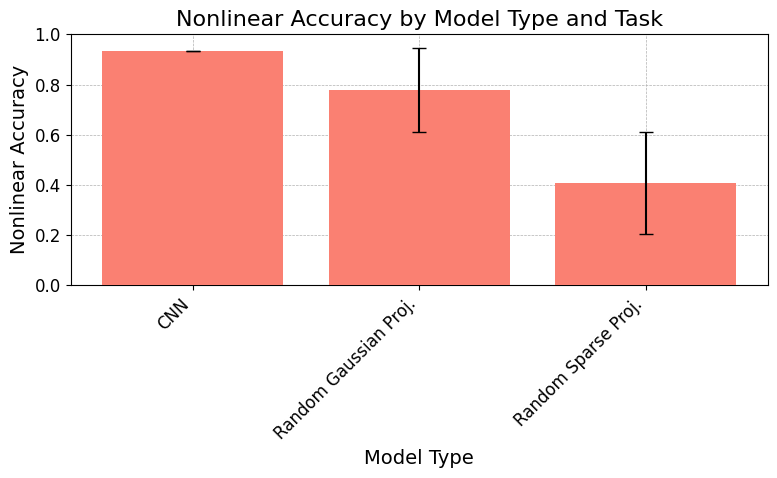

In [42]:
# Reorder DataFrame based on the specified order
order = [
    'CNN', 'Random Gaussian Proj.',
    'FTA', 'Random Sparse Proj.']
df_seaquest_clean['order'] = df_seaquest_clean['label'].apply(lambda x: order.index(x) if x in order else len(order))
df_seaquest_clean = df_seaquest_clean.sort_values('order')

# Increase font sizes
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize

# Plotting for linear accuracy
fig, ax = plt.subplots(figsize=(8, 5))

ax.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=0)
ax.bar(df_seaquest_clean['label'], df_seaquest_clean['lin_acc_mean'],
       yerr=df_seaquest_clean['lin_acc_std_err'], capsize=5, color='skyblue',
       zorder=3)

ax.set_xlabel('Model Type')
ax.set_ylabel('Linear Accuracy')
ax.set_title('Linear Accuracy by Model Type and Task')
ax.set_xticklabels(df_seaquest_clean['label'], rotation=45, ha='right')
ax.set_ylim(0.0, 1.0)

plt.tight_layout()
plt.show()

# Plotting for nonlinear accuracy
fig, ax = plt.subplots(figsize=(8, 5))

ax.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=0)
ax.bar(df_seaquest_clean['label'], df_seaquest_clean['nonlin_acc_mean'],
       yerr=df_seaquest_clean['nonlin_acc_std_err'], capsize=5, color='salmon',
       zorder=3)

ax.set_xlabel('Model Type')
ax.set_ylabel('Nonlinear Accuracy')
ax.set_title('Nonlinear Accuracy by Model Type and Task')
ax.set_xticklabels(df_seaquest_clean['label'], rotation=45, ha='right')
ax.set_ylim(0.0, 1.0)

plt.tight_layout()
plt.show()